# Importation des librairies

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Utilisation du dataset de titanic

In [80]:
titanic= pd.read_csv("data/titanic-passengers.csv", sep=';', encoding='iso-8859-1')
df=titanic.copy()

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [82]:
df= df.set_index('PassengerId') #changement de l'index
df["Sex"]=df["Sex"].map({"male":1, "female":0}) #modification de la colonne Sex
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
343,No,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,NaN,S
76,No,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
641,No,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,NaN,S
568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,NaN,S
672,No,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 343 to 428
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [84]:
#Modification des valeurs manquantes
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 343 to 428
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# 1. Application de la regression logistique

In [124]:
x=df[['Pclass','Sex', 'Age','Fare']] #features dataset
y=df['Survived'] #label dataset

In [125]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=5) #splittinf
logreg=LogisticRegression() #instance de la regression logistique
logreg.fit(x_train, y_train) #trainning
y_pred=logreg.predict(x_test) #predicted output
logreg.score(x_test,y_test) #score au test


0.7821229050279329

# 2. Distribution de la regression logistique 

In [87]:
df1=df #copie du dataset
df1["Survived"]=df1["Survived"].map({"Yes":1, "No":0}) #cleanup sur la colonne Suvived
df1["Survived"] #view


PassengerId
343    0
76     0
641    0
568    0
672    0
      ..
10     1
61     0
535    0
102    0
428    1
Name: Survived, Length: 891, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

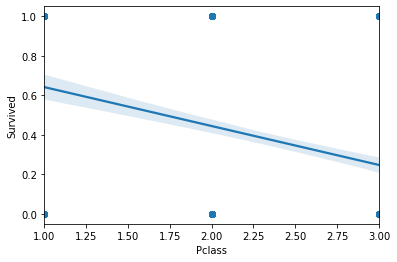

In [88]:
sns.regplot(x='Pclass', y='Survived', data=df1) #selon la classe


<AxesSubplot:xlabel='Age', ylabel='Survived'>

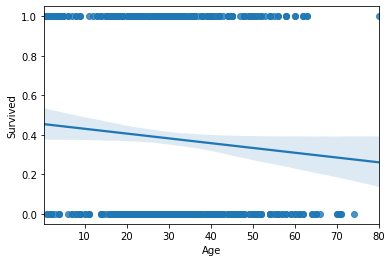

In [89]:
sns.regplot(x='Age', y='Survived', data=df1) #selon l'age

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

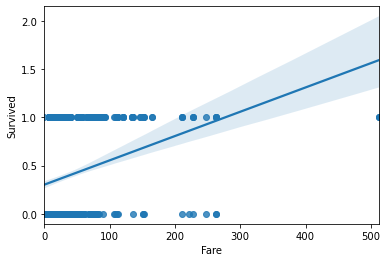

In [90]:
sns.regplot(x='Fare', y='Survived', data=df1) #selon le tarif

# 2. Utilisation d'une matrice de confusion pour valider notre modèle

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

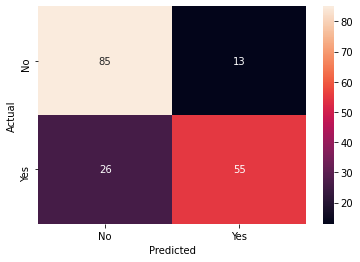

In [93]:
confusion_matrix=pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

# 2. ROC/AUC

In [140]:
clf=LogisticRegression()
clf.fit(x_train, y_train) #Training
y_pred=clf.predict(x_test) #Predict
pred_prob=clf.predict_proba(x_test)
roc_auc_score(y_test, pred_prob[:, 1]) #Score AUC                    

0.8442302847064752

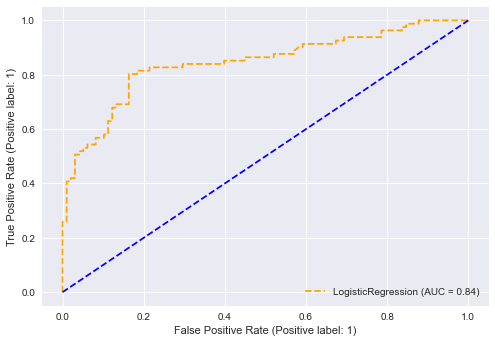

In [141]:
#Visualisation de la courbe ROC
metrics.plot_roc_curve(clf, x_test, y_test, linestyle='--', color='orange')
#Courbe ROC pour fpr=tpr
random_probs = [0 for i in range(len(y_test))] #Génère des 0 y_test fois
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.show()